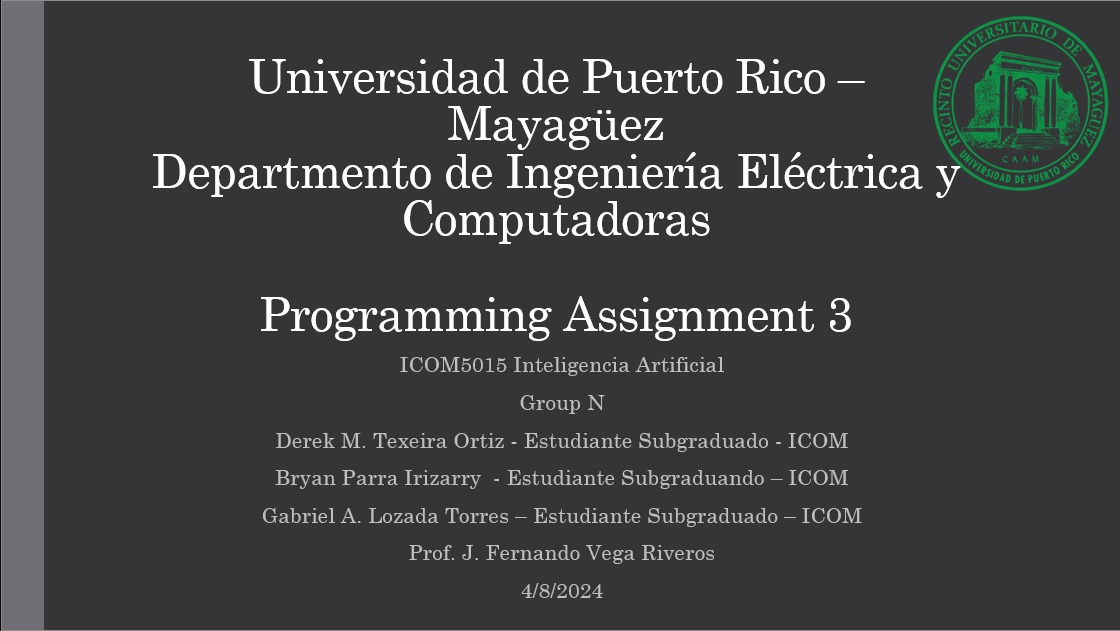

In [21]:
import inspect
# Puzzle
from Puzzle.FirstChoiceHillClimbing_P import * 
from Puzzle.RandomHillClimbing_P import *
from Puzzle.SimulatedAnnealing_P import * 
from Puzzle.SteepestHillClimbing_P import *  

# Queens
from Queens.FirstChoiceHillClimbing_Q import *
from Queens.RandomHillClimbing_Q import *
from Queens.SimulatedAnnealing_Q import *
from Queens.SteepestHillClimbing_Q import *

# Resumen

El presente informe aborda la aplicación de diversos algoritmos para resolver dos problemas clásicos en el campo de la inteligencia artificial: el problema del 8-puzzle y el problema de las 8 reinas. Se exploraron variantes de la escalada de colina, el recocido simulado y el reinicio aleatorio para encontrar soluciones óptimas o satisfactorias para estos desafíos. Para el problema del 8-puzzle, se observó que aunque los métodos más eficientes computacionalmente no siempre alcanzaron la solución óptima, los enfoques de recocido simulado y reinicio aleatorio mostraron una precisión del 50%, a pesar de su mayor costo computacional. En cuanto al problema de las 8 reinas, se encontró que tanto la escalada de colina como el recocido simulado tuvieron un alto éxito, con una tasa de éxito mayor al 90%, demostrando su eficacia en la búsqueda de soluciones satisfactorias. En resumen, este estudio ofrece una visión comparativa de diferentes estrategias heurísticas para resolver problemas de optimización y búsqueda en inteligencia artificial, destacando la importancia de considerar aspectos como la precisión, el tiempo de ejecución y los recursos computacionales al elegir el método más adecuado para cada problema específico.

# Introducción

Los métodos de búsqueda que hemos explorado en asignaciones anteriores están diseñados para explorar los espacios de búsqueda de manera sistemática. Este enfoque sistemático implica almacenar una o más rutas en la memoria y hacer un seguimiento de las alternativas investigadas en cada punto a lo largo de la ruta. Cuando se encuentra una solución, el camino que lleva a esa solución se utiliza como respuesta al problema. Sin embargo, en varios problemas, el camino hacia la solución no es crucial. Por ejemplo, en el problema de las 8 reinas, lo importante es la disposición final de las reinas, no el orden en que se colocaron. Este mismo principio se aplica a muchas aplicaciones importantes, como el diseño de plantas de producción, circuitos integrados, optimización de redes de telecomunicaciones, programación automática, rutas de vehículos, programación de talleres y gestión de carteras.

Cuando el camino hacia la meta no es crucial, es posible considerar algoritmos alternativos que no se centren en los caminos en absoluto. Los algoritmos de búsqueda local, a diferencia de los sistemáticos, utilizan solo un nodo actual y generalmente se desplazan solo a los nodos vecinos. Las rutas de búsqueda no se suelen almacenar. A pesar de no ser sistemáticos, los algoritmos de búsqueda local ofrecen dos ventajas:

-   Requieren muy poca memoria, a menudo solo una cantidad constante.
-   A menudo pueden encontrar soluciones satisfactorias en espacios de estado grandes o infinitos (continuos), que son inadecuados para los algoritmos sistemáticos.

Además de encontrar objetivos, los algoritmos de búsqueda local son beneficiosos para resolver problemas de optimización pura donde el objetivo es encontrar el mejor estado según una función objetivo. Por ejemplo, en la evolución darwiniana, no hay una prueba de meta o un costo de ruta para el problema de optimización, pero se busca optimizar la función objetivo de aptitud reproductiva proporcionada por la naturaleza. Los algoritmos de búsqueda local pueden ser útiles en este contexto para encontrar soluciones que maximicen esta función objetivo sin necesidad de seguir un camino específico hacia la solución.

Para comprender la búsqueda local, es útil considerar el paisaje del espacio de estado representado en la siguiente figura (grafica hill climb que aparece en el libro). En este paisaje, cada ubicación está definida por un estado y cada elevación está definida por el valor de la función de costo heurística o función objetivo. Si la elevación corresponde al costo mínimo global, el objetivo es encontrar el valle más bajo, que representa un mínimo global. Por otro lado, si la elevación corresponde a una función objetivo, el objetivo es localizar el pico más alto, que representa un máximo global (estos conceptos pueden transformarse entre sí al incluir un signo menos). Los algoritmos de búsqueda local exploran este panorama buscando los mínimos o máximos, dependiendo del problema. Un algoritmo de búsqueda local completo siempre descubre un objetivo si existe, mientras que un algoritmo óptimo siempre encuentra un mínimo o máximo global.

# Ejercicio 4.4 AIMA Exercise 

## Algoritmos

### Hill Climb

El algoritmo Hill Climb, también conocido como "escalada de colina", es una técnica de búsqueda local que busca una solución óptima (local) explorando las vecindades en un espacio de búsqueda. Su funcionamiento básico se puede desglosar en los siguientes pasos:

- Inicialización: Se comienza con una solución inicial, que puede ser generada aleatoriamente o seleccionada de alguna manera específica.

- Evaluación: La calidad de la solución inicial se evalúa utilizando una función objetivo o de evaluación. Esta función asigna un valor numérico a cada solución según su calidad o aptitud para el problema en cuestión. El objetivo del algoritmo es encontrar la solución con el valor más alto (en problemas de maximización) o más bajo (en problemas de minimización) según la función objetivo.

- Búsqueda local: El algoritmo realiza iterativamente pequeños cambios en la solución actual para generar soluciones vecinas y evaluar su calidad. Se selecciona la mejor solución vecina, es decir, aquella con el mejor valor según la función objetivo, y se compara con la solución actual.

- Actualización: Si la mejor solución vecina mejora la solución actual, se actualiza la solución actual con la mejor solución vecina y se repite el proceso. Si no se encuentra una solución vecina mejor, el algoritmo puede terminar o realizar alguna operación adicional para explorar otras áreas del espacio de búsqueda.

- Convergencia: El algoritmo puede converger hacia una solución óptima local si no encuentra soluciones vecinas que mejoren la solución actual. Sin embargo, también puede incorporar estrategias para escapar de óptimos locales y explorar áreas más amplias del espacio de búsqueda.

- El algoritmo Hill Climb es útil para problemas donde se busca una solución óptima local y puede ser adaptado con diversas estrategias para mejorar su desempeño y evitar estancarse en óptimos locales

### First Choice Hill Climb

El First Choice Hill Climb es una variante del algoritmo Hill Climbing que difiere en la forma en que selecciona la siguiente solución a explorar. En este enfoque, en lugar de examinar todas las soluciones vecinas y seleccionar la mejor, solo se examina la primera solución vecina que mejore la solución actual. Es decir, el algoritmo elige la primera mejora que encuentra y se mueve hacia esa solución. Esto puede hacer que el algoritmo sea más eficiente en términos de tiempo computacional, ya que no evalúa todas las soluciones vecinas en cada iteración.

El proceso básico del algoritmo First Choice Hill Climbing sigue estos pasos:

- Inicialización: Se parte de una solución inicial.

- Evaluación: Se evalúa la calidad de la solución inicial utilizando una función objetivo.

- Generación de vecinos: Se generan las soluciones vecinas de la solución actual, que son soluciones obtenidas a partir de pequeños cambios en la solución actual.

- Selección del primer vecino mejor: Se examina la primera solución vecina que mejore la solución actual en términos de la función objetivo.

- Actualización: Si se encuentra una solución vecina mejor, se actualiza la solución actual con esa solución y se repite el proceso. Si no se encuentra una solución vecina mejor, el algoritmo puede terminar o realizar alguna operación de exploración adicional.

- Convergencia: Al igual que en el Hill Climbing clásico, el algoritmo puede converger hacia un óptimo local o global, dependiendo de la naturaleza del problema y la estructura del espacio de búsqueda.

En resumen, el First Choice Hill Climb es una estrategia más rápida y eficiente en términos computacionales al seleccionar solo la primera mejora encontrada en lugar de examinar todas las soluciones vecinas. Sin embargo, al igual que con el Hill Climbing clásico, la convergencia puede depender de la naturaleza del problema y la estructura del espacio de búsqueda.


### Random Restart Hill Climbing

El Random Restart Hill Climbing es otra variante del algoritmo Hill Climbing que aborda el problema de quedar atrapado en óptimos locales. En este enfoque, cuando se alcanza un óptimo local, en lugar de quedarse allí, se reinicia la búsqueda aleatoriamente desde una nueva solución inicial en el espacio de búsqueda. Esto se hace para escapar de los óptimos locales y explorar otras áreas del espacio de búsqueda en busca de una solución mejor.

El proceso básico del algoritmo Random Restart Hill Climbing sigue estos pasos:

- Inicialización: Se parte de una solución inicial.

- Evaluación: Se evalúa la calidad de la solución inicial utilizando una función objetivo.

- Generación de vecinos: Se generan las soluciones vecinas de la solución actual, que son soluciones obtenidas a partir de pequeños cambios en la solución actual.

- Selección de la mejor solución vecina: Se selecciona la mejor solución vecina en términos de la función objetivo.

- Actualización: Si la mejor solución vecina mejora la solución actual, se actualiza la solución actual con esa solución y se repite el proceso. Si no se encuentra una solución vecina mejor, se procede al siguiente paso.

- Reinicio aleatorio: Se selecciona una nueva solución inicial aleatoria en el espacio de búsqueda.

- Convergencia: El algoritmo puede repetir el proceso de búsqueda local desde la nueva solución inicial y continuar iterando hasta que se alcance un criterio de parada predefinido, como un número máximo de iteraciones, un límite de tiempo, o se encuentre una solución satisfactoria.

El Random Restart Hill Climbing puede ser útil para escapar de óptimos locales y explorar áreas más amplias del espacio de búsqueda, lo que aumenta las posibilidades de encontrar una solución globalmente óptima. Sin embargo, también puede requerir más tiempo computacional ya que implica reiniciar la búsqueda desde múltiples puntos aleatorios en el espacio de búsqueda. Por lo tanto, es importante equilibrar el beneficio de exploración con el costo computacional en función del problema en cuestión.

### Simulated Annealing 

El algoritmo de Simulated Annealing es una técnica de optimización global utilizada para encontrar soluciones aproximadas en problemas complejos. Se inspira en el proceso de recocido utilizado en la metalurgia, donde un material se calienta y luego se enfría lentamente para reducir su energía y alcanzar un estado de menor energía y mayor estabilidad.

El algoritmo de Simulated Annealing se basa en la idea de que una búsqueda aleatoria, guiada por una estrategia probabilística, puede encontrar soluciones óptimas en un espacio de búsqueda amplio y complejo. Acepta soluciones subóptimas en el proceso de búsqueda con cierta probabilidad, lo que le permite explorar áreas del espacio de búsqueda que pueden contener soluciones mejores que las soluciones actuales.

El proceso básico del algoritmo de Simulated Annealing consta de los siguientes pasos:

- Inicialización: Se parte de una solución inicial aleatoria o de alguna otra heurística.

- Evaluación: Se evalúa la calidad de la solución inicial utilizando una función objetivo que representa el criterio de optimización del problema.

- Generación de vecinos: Se generan las soluciones vecinas de la solución actual, que son soluciones obtenidas a partir de pequeños cambios en la solución actual.

- Selección de la mejor solución vecina: Se selecciona una solución vecina de acuerdo con una función de probabilidad, que puede estar basada en la diferencia de energía (o valor de la función objetivo) entre la solución actual y la solución vecina.

- Actualización: Si la solución vecina es mejor que la solución actual, se actualiza la solución actual con esa solución. Si no lo es, se puede aceptar la solución vecina con una cierta probabilidad que depende de la diferencia de energía y de un parámetro llamado "temperatura" que controla la exploración del espacio de búsqueda.

- Disminución de la temperatura: La temperatura se reduce en cada iteración del algoritmo, lo que reduce la probabilidad de aceptar soluciones peores a medida que el algoritmo avanza en la búsqueda. Esto simula el proceso de enfriamiento del material en el proceso de recocido.

- Convergencia: El algoritmo se repite hasta que se alcance un criterio de parada predefinido, como un límite de tiempo, un número máximo de iteraciones o una temperatura mínima.

El algoritmo de Simulated Annealing es eficaz para encontrar soluciones aproximadas a problemas de optimización global en espacios de búsqueda complejos y con múltiples óptimos locales. Sin embargo, la calidad de la solución encontrada depende del ajuste adecuado de los parámetros del algoritmo, como la temperatura inicial, la estrategia de enfriamiento y la función de probabilidad de aceptación. Por lo tanto, es importante calibrar correctamente estos parámetros para obtener resultados óptimos.

## Problema de los 8-Queens

El problema de las 8 reinas es un desafío clásico en el ámbito de las matemáticas y la informática. Consiste en colocar 8 reinas en un tablero de ajedrez de 8x8 de manera que ninguna reina pueda amenazar a otra, es decir, ninguna reina comparta fila, columna o diagonal con otra reina.Este problema ha sido un tema de interés desde el siglo XVIII y ha capturado la atención de matemáticos, informáticos y entusiastas de los juegos de estrategia. Aunque inicialmente se planteó para un tablero de 8x8, el problema se ha generalizado para tableros de cualquier tamaño, aunque el caso de las 8 reinas sigue siendo el más estudiado y conocido.Resolver el problema de las 8 reinas implica encontrar una configuración válida que cumpla con todas las restricciones impuestas. Se aborda utilizando algoritmos de búsqueda, optimización y heurística, que buscan explorar el espacio de soluciones en busca de una configuración válida. Este problema es relevante en informática ya que ha sido fundamental en el desarrollo de algoritmos de optimización y resolución de problemas combinatorios. Además, ha sido un campo de estudio en investigación en inteligencia artificial y algoritmos genéticos, sirviendo como base para entender y abordar problemas más complejos. 

### Steepest Ascent Hill Climbing

Calcula el coste heurístico, es decir, el número de reinas que se atacan entre sí, de todas las posiciones vacías en el tablero actual y elige la que tenga el coste más bajo.

In [28]:
print(inspect.getsource(SHC_Q))

def SHC_Q():
    global search_cost
    title = "EightQueens_steepestHillClimbing"
    startTime = time.time()
    successCase = 0
    totalCase = 0
    result = title + " result:\n\n"
    with open("Queens\EightQueensTest2.txt", "r") as ins:
        for line in ins:
            # print ("case: ", totalCase)
            global FAILED
            FAILED = False
            totalCase += 1
            board = []
            for col in line.split():
                board.append(int(col))
            board = solution_steepestHillClimbing(board)
            if FAILED:
                result += "Failed!"
            else:
                successCase += 1
                for col in range(len(board)):
                    result += str(board[col]) + " "
            result += "\n"
    
    endTime = time.time()
    result += "\nTotal time: " + str(endTime - startTime) + '\n'
    result += "Total case number: " + str(totalCase) + ", Success case number: " + str(successCase) + '\n'
    result += "S

### First Choice Hill Climbing

Elije de forma aleatoria una posición vacía, si la posición seleccionada tiene un mejor coste heurístico, es decir que tiene un menor o igual número de conflictos que la actual entonces la actualiza.

El algoritmo comienza generando una solución aleatoria al problema de las 8 reinas y evaluando su costo. Luego, se generan varias nuevas soluciones aplicando pequeñas modificaciones a la solución actual, como mover una reina a una nueva posición aleatoria en su columna. Se evalúa el costo de cada nueva solución y se selecciona la primera que mejora el coste de la solución actual. Si ninguna de las nuevas soluciones mejora el coste de la solución actual, se mantiene la solución actual.

Este proceso se repite hasta que se alcanza una solución que satisfaga todas las restricciones del problema o hasta que se agota el número máximo de iteraciones.

In [22]:
print(inspect.getsource(FCHC_Q))

def FCHC_Q():
    global search_cost
    title = "EightQueens_FirstChoiceHillClimbing"
    startTime = time.time()
    successCase = 0
    totalCase = 0
    result = title + " result:\n\n"
    with open("Queens\EightQueensTest2.txt", "r") as ins:
        for line in ins:
            # print ("case: ", totalCase)
            global FAILED
            FAILED = False
            totalCase += 1
            board = []
            for col in line.split():
                board.append(int(col))
            board = solution_FirstChoiceHillClimbing(board)
            if FAILED:
                result += "Failed!"
            else:
                successCase += 1
                for col in range(len(board)):
                    result += str(board[col]) + " "
            result += "\n"
    
    endTime = time.time()
    result += "\nTotal time: " + str(endTime - startTime) + '\n'
    result += "Total case number: " + str(totalCase) + ", Success case number: " + str(successCase) + '\n'
    resul

### Random Restart Hill Climbing


Se parte de una solución aleatoria, es decir, una configuración de reinas colocadas en el tablero de manera aleatoria. Luego, se evalúa el costo de esta solución, es decir, se calcula el número de conflictos entre las reinas.

A continuación, se genera una nueva solución mediante una pequeña modificación de la solución actual. Por ejemplo, se puede mover una reina a una nueva posición aleatoria en su columna. Se evalúa el costo de la nueva solución y se compara con la calidad de la solución anterior. Si la nueva solución es mejor, se acepta como la nueva solución actual. Si la nueva solución es peor, se descarta y se genera una nueva solución.

Este proceso se repite hasta que se alcanza una solución que satisfaga todas las restricciones del problema o hasta que se agota el número máximo de iteraciones. Es importante tener en cuenta que el método no garantiza encontrar la solución óptima del problema, sino que encuentra una solución que es mejor que la solución inicial.

In [23]:
print(inspect.getsource(RHC_Q))

def RHC_Q():
    global search_cost
    title = "EightQueens_RandomHillClimbing"
    startTime = time.time()
    successCase = 0
    totalCase = 0
    result = title + " result:\n\n"
    with open("Queens\EightQueensTest2.txt", "r") as ins:
        for line in ins:
            print ("case: ", totalCase)
            global FAILED
            FAILED = False
            totalCase += 1
            board = []
            for col in line.split():
                board.append(int(col))
            board = solution_RandomHillClimbing(board)
            if FAILED:
                result += "Failed!"
            else:
                successCase += 1
                for col in range(len(board)):
                    result += str(board[col]) + " "
            result += "\n"
    
    endTime = time.time()
    result += "\nTotal time: " + str(endTime - startTime) + '\n'
    result += "Total case number: " + str(totalCase) + ", Success case number: " + str(successCase) + '\n'
    result += "Success

### Simulated Annealing

Este algoritmo comparte similitudes con el método de búsqueda aleatoria en colinas, pero con una diferencia clave: introduce una probabilidad de aceptar soluciones subóptimas. Esto permite una exploración más amplia del espacio de búsqueda, potencialmente conduciendo a soluciones más óptimas.

El proceso comienza con la generación de una solución aleatoria para el problema de las 8 reinas, seguida de la evaluación de su calidad. Luego, se realizan pequeñas modificaciones en la solución actual, como mover una reina a una nueva posición aleatoria en su columna, y se evalúa la calidad de la nueva configuración.

Si la nueva solución es mejor que la actual, se acepta automáticamente como la nueva solución actual. Sin embargo, si la nueva solución resulta ser peor, se calcula una probabilidad de aceptación basada en la diferencia de calidad entre la solución actual y la nueva solución, junto con un parámetro de temperatura que se reduce gradualmente en cada iteración. Esta probabilidad de aceptación se determina mediante la función de Boltzmann.

In [24]:
print(inspect.getsource(SA_Q))

def SA_Q():
    global search_cost
    title = "EightQueens_SimulatedAnnealing"
    startTime = time.time()
    successCase = 0
    totalCase = 0
    result = title + " result:\n\n"
    with open("Queens\EightQueensTest2.txt", "r") as ins:
        for line in ins:
            print ("case: ", totalCase)
            global FAILED
            FAILED = False
            totalCase += 1
            board = []
            for col in line.split():
                board.append(int(col))
            board = solution_SimulatedAnnealing(board)
            if FAILED:
                result += "Failed!"
            else:
                successCase += 1
                for col in range(len(board)):
                    result += str(board[col]) + " "
            result += "\n"
    
    endTime = time.time()
    result += "\nTotal time: " + str(endTime - startTime) + '\n'
    result += "Total case number: " + str(totalCase) + ", Success case number: " + str(successCase) + '\n'
    result += "Success 

### Resultados y Anáalisis

![WhatsApp Image 2024-04-08 at 22.37.53_efd52b6e.jpg](<attachment:WhatsApp Image 2024-04-08 at 22.37.53_efd52b6e.jpg>)

Figura 1: Tiempo de ejecucióon de cada algoritmo
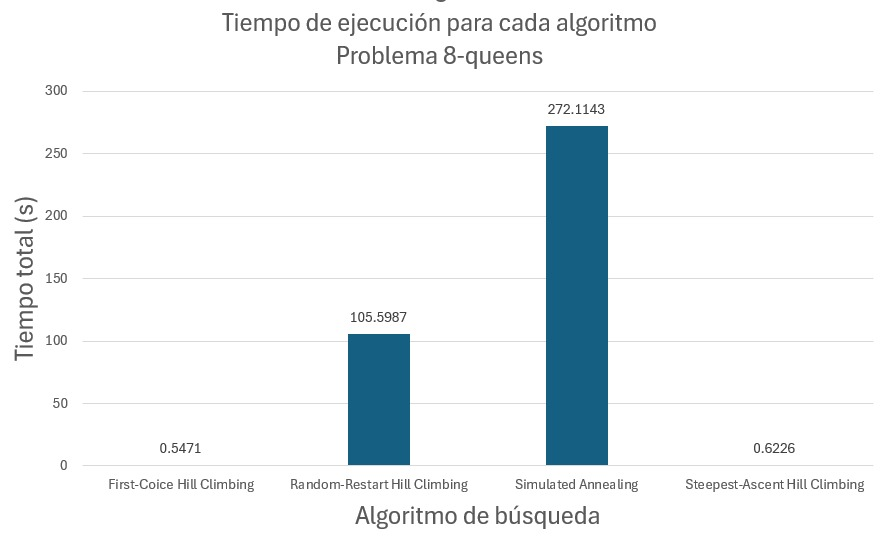

![WhatsApp Image 2024-04-08 at 22.41.51_6c4f31d3.jpg](<attachment:WhatsApp Image 2024-04-08 at 22.41.51_6c4f31d3.jpg>)

Figura 2: Porcentaje de éexito de los algoritmos
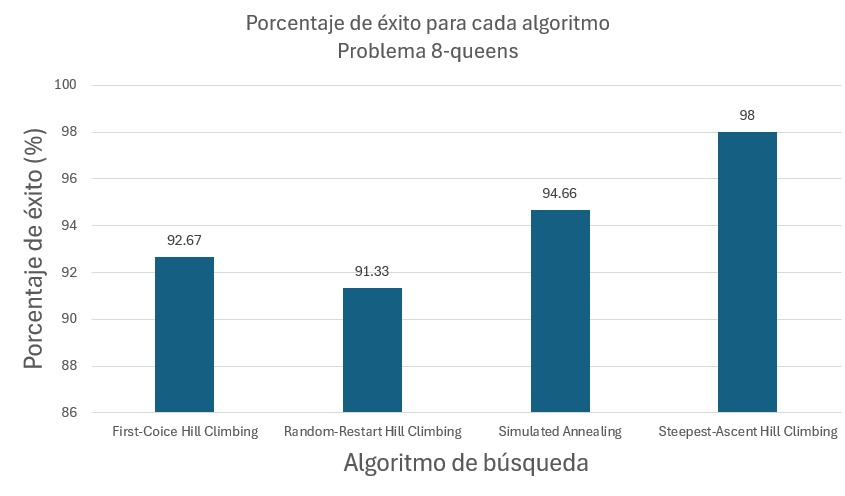

De la Figura 1, obtenidos se observa que al algoritmo que le tomo más tiempo fue al Simulated annealing, el cual tardo un total de 4 minutos con 32 egundos(272.1143 segundos) en obtener la solución de los 150 ejemplos. El siguiente fue el Random-Restart Hill Climbing con un tiempo de 1 minuto con 40 (105.5987 segundos). Finalmente se encuentra el First-Choice Hill Climbing y el Steepest-Ascent Hill climbing con sus valores muy bajos. Estos dos últimos son los algoritmos más rápidos para este tipo de problemas. Analizando la Figura 2 que indica el porcentaje de éxito se observa que los cuatro algoritmos lograron un porcentaje de éxito mayor a 90 %, lo cual indica que este tipo de algoritmos heurísticos son perfectos para este tipo de problemas.

## Problema de los 8-Ppuzzle

El 8-puzzle es un juego de rompecabezas deslizante que se juega en un tablero de 3x3 con ocho fichas numeradas del 1 al 8, dispuestas inicialmente en un orden aleatorio, junto con un espacio vacío que permite mover las fichas adyacentes a él. El objetivo del juego es mover las fichas de manera secuencial utilizando movimientos permitidos (arriba, abajo, izquierda, derecha) para reorganizarlas y lograr un estado específico, generalmente el estado objetivo que se muestra a continuación. En este estado objetivo, las fichas están ordenadas en orden ascendente desde la esquina superior izquierda hasta la esquina inferior derecha, con el espacio vacío en la posición inferior derecha. El desafío consiste en encontrar una secuencia de movimientos que lleve el tablero desde una disposición inicial aleatoria a este estado objetivo.

![WhatsApp Image 2024-04-08 at 21.32.34_7b511414.jpg](<attachment:WhatsApp Image 2024-04-08 at 21.32.34_7b511414.jpg>)
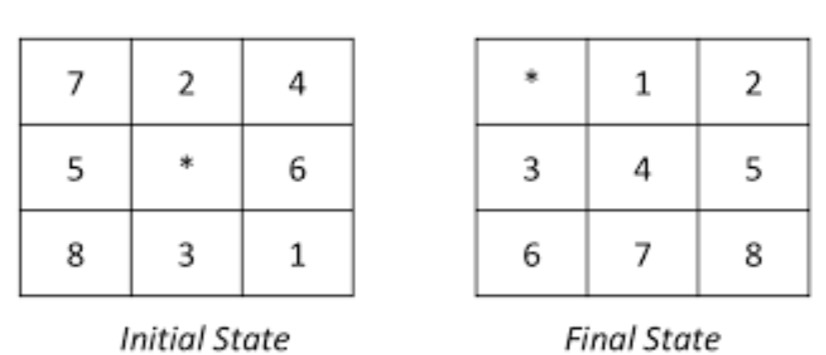

La ficha vacía del 8-puzzle tiene la libertad de moverse hacia arriba, abajo, izquierda o derecha, lo que permite intercambiar su posición con la ficha adyacente. Esto significa que hay múltiples combinaciones de movimientos que se pueden realizar para llegar a la configuración deseada del tablero. El 8-puzzle se puede ver como un problema de búsqueda en el que cada configuración del tablero representa un estado en un espacio de posibles estados. Los movimientos válidos entre estados son las acciones que se pueden tomar para cambiar la disposición de las fichas. El objetivo del juego es encontrar una secuencia de movimientos que nos lleve desde la disposición inicial del tablero hasta la disposición objetivo que queremos alcanzar.

En este estudio se emplearon algoritmos heurísticos para abordar el problema del 8-puzzle. Los algoritmos utilizados fueron:

- Hill climbing steepest-ascent (Escalada de colina con el criterio de ascenso más pronunciado)
- First choice hill climbing (Escalada de colina de primera opción)
- Random restart hill climbing (Escalada de colina con reinicio aleatorio)
- Simulated annealing (Recocido simulado)

El propósito de esta investigación es analizar la convergencia y la velocidad de convergencia de cada uno de estos algoritmos. Para ello, se llevaron a cabo 1500 simulaciones con estados iniciales aleatorios en el 8-puzzle para cada uno de los algoritmos. Las figuras siguientes resumen los resultados obtenidos.

Es importante destacar que el funcionamiento de los métodos utilizados para resolver el problema del 8-puzzle es similar al problema de las 8 reinas, por lo que no se proporcionarán explicaciones detalladas nuevamente.

### Steepest Ascent Hill Climbing

In [29]:
print(inspect.getsource(SHC_P))

def SHC_P():
    global search_cost
    
    title = "EightPuzzle_steepestHillClimbing"
    startTime = time.time()
    successCase = 0
    totalCase = 0
    result = title + " result:\n\n"
    with open("Puzzle\EightPuzzleTest2.txt", "r") as ins:
        for line in ins:
            # print ("case: ", totalCase)
            global FAILED
            FAILED = False
            totalCase += 1
            board = []
            for col in line.split():
                board.append(int(col))
            board = solution_steepestHillClimbing(board)
            if FAILED:
                result += "Failed!"
            else:
                successCase += 1
                for col in range(len(board)):
                    result += str(board[col]) + " "
            result += "\n"
    
    endTime = time.time()
    result += "\nTotal time: " + str(endTime - startTime) + '\n'
    result += "Total case number: " + str(totalCase) + ", Success case number: " + str(successCase) + '\n'
    result 

### First Choice Hill Climbing 

In [25]:
print(inspect.getsource(FCHC_8P))

def FCHC_8P():
    title = "EightPuzzle_FirstChoiceHillClimbing"
    startTime = time.time()
    successCase = 0
    totalCase = 0
    result = title + " result:\n\n"
    with open("Puzzle\EightPuzzleTest2.txt", "r") as ins:
        for line in ins:
            print("case: ", totalCase)
            global FAILED
            FAILED = False
            totalCase += 1
            board = []
            for col in line.split():
                board.append(int(col))
            board = solution_FirstChoiceHillClimbing(board)
            if FAILED:
                result += "Failed!"
            else:
                successCase += 1
                for col in range(len(board)):
                    result += str(board[col]) + " "
            result += "\n"
    
    endTime = time.time()
    result += "\nTotal time: " + str(endTime - startTime) + '\n'
    result += "Total case number: " + str(totalCase) + ", Success case number: " + str(successCase) + '\n'
    result += "Success rate: " + s

### Random Restart Hill Climbing

In [26]:
print(inspect.getsource(RHC_8P))

def RHC_8P():
    global search_cost
    title = "EightPuzzle_RandomHillClimbing"
    startTime = time.time()
    successCase = 0
    totalCase = 0
    result = title + " result:\n\n"
    with open("Puzzle\EightPuzzleTest2.txt", "r") as ins:
        for line in ins:
            # print ("case: ", totalCase)
            global FAILED
            FAILED = False
            totalCase += 1
            board = []
            for col in line.split():
                board.append(int(col))
            board = solution_RandomHillClimbing(board)
            if FAILED:
                result += "Failed!"
            else:
                successCase += 1
                for col in range(len(board)):
                    result += str(board[col]) + " "
            result += "\n"
    
    endTime = time.time()
    result += "\nTotal time: " + str(endTime - startTime) + '\n'
    result += "Total case number: " + str(totalCase) + ", Success case number: " + str(successCase) + '\n'
    result += "Succ

### Simulated Annealing

In [27]:
print(inspect.getsource(SA_P))

def SA_P():
    global search_cost
    title = "EightPuzzle_SimulatedAnnealing"
    startTime = time.time()
    successCase = 0
    totalCase = 0
    result = title + " result:\n\n"
    with open("Puzzle\EightPuzzleTest2.txt", "r") as ins:
        for line in ins:
            # print ("case: ", totalCase)
            global FAILED
            FAILED = False
            totalCase += 1
            board = []
            for col in line.split():
                board.append(int(col))
            board = solution_SimulatedAnnealing(board)
            if FAILED:
                result += "Failed!"
            else:
                successCase += 1
                for col in range(len(board)):
                    result += str(board[col]) + " "
            result += "\n"
    
    endTime = time.time()
    result += "\nTotal time: " + str(endTime - startTime) + '\n'
    result += "Total case number: " + str(totalCase) + ", Success case number: " + str(successCase) + '\n'
    result += "Succes

### Resultados y Anáalisis

![WhatsApp Image 2024-04-08 at 22.20.28_3ba1acc2.jpg](<attachment:WhatsApp Image 2024-04-08 at 22.20.28_3ba1acc2.jpg>)

Figura 3: Tiempo de ejecucióon de cada algoritmo
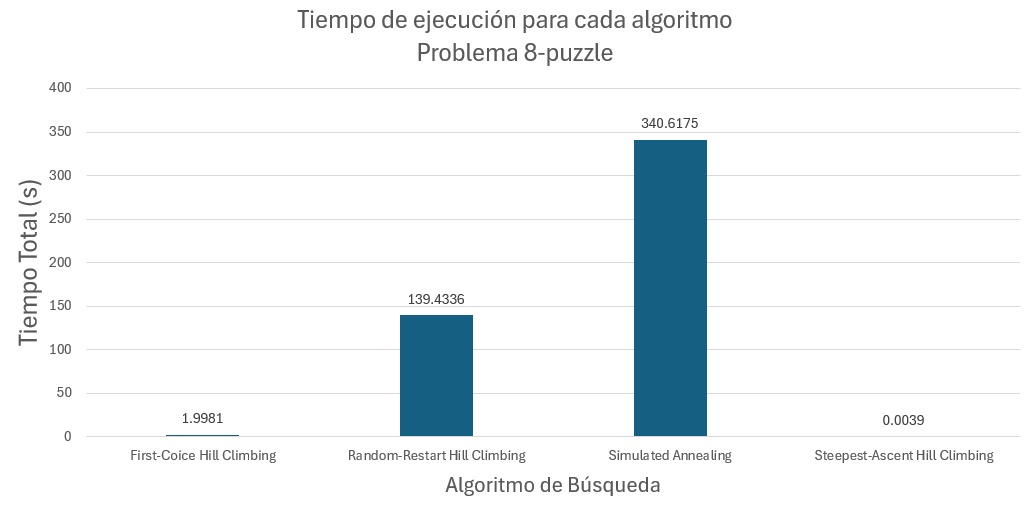

![WhatsApp Image 2024-04-08 at 22.29.50_cfa452d4.jpg](<attachment:WhatsApp Image 2024-04-08 at 22.29.50_cfa452d4.jpg>)

Figura 4: Porcentaje de éexito de cada algoritmo
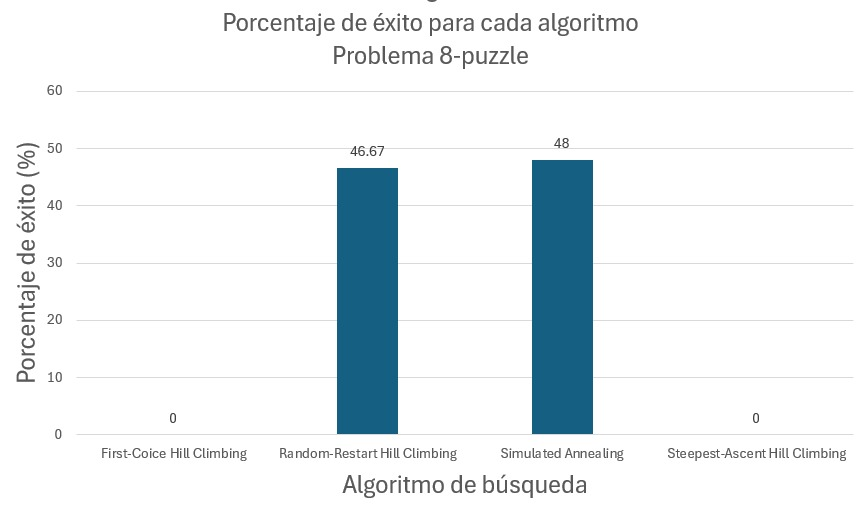

De los resultados obtenidos se observa en la Figura 3que al algoritmo que le tomo más tiempo fue al Simulated annealing, el cual tardo un total de casi 6 minutos (340.6175 segundos) en obtener la solución de los 150 ejemplos. El siguiente fue el Ramdom restart hill climbing con un tiempo de 2.32 minutos (139.4336 segundos). Finalmente se encuentra el First choise hill climbing y el Hill climbing steepest-ascent con tiempo menor. Se podría decir que los más rápidos son los dos últimos algoritmos, no obstante, aún falta analizar el porcentaje de éxito. Analizando la fiFura q 4ue indica el porcentaje de éxito s,  observa que solo el Random restart hill climbing y el Simulated annealing lograron un éxito de 46.67% y 48% respectivamente, mientras que el el First choise hill climbing y el Steepest-ascent Hill climbing lograron un éxito del 0%, esto fue debido a que probablemente quedaron en máximos locales tal como indica la teoría.\3

# Cóodigo

### Imports

In [30]:
''' Imports '''
# Puzzle
from Puzzle.FirstChoiceHillClimbing_P import * 
from Puzzle.RandomHillClimbing_P import *
from Puzzle.SimulatedAnnealing_P import * 
from Puzzle.SteepestHillClimbing_P import *  

# Queens
from Queens.FirstChoiceHillClimbing_Q import *
from Queens.RandomHillClimbing_Q import *
from Queens.SimulatedAnnealing_Q import *
from Queens.SteepestHillClimbing_Q import *

import warnings
warnings.filterwarnings("ignore")

## Puzzle Problem

### First Choice Hill Climbing

In [2]:
success_rate = FCHC_8P()

case:  0
case:  1
case:  2
case:  3
case:  4
case:  5
case:  6
case:  7
case:  8
case:  9
case:  10
case:  11
case:  12
case:  13
case:  14
case:  15
case:  16
case:  17
case:  18
case:  19
case:  20
case:  21
case:  22
case:  23
case:  24
case:  25
case:  26
case:  27
case:  28
case:  29
case:  30
case:  31
case:  32
case:  33
case:  34
case:  35
case:  36
case:  37
case:  38
case:  39
case:  40
case:  41
case:  42
case:  43
case:  44
case:  45
case:  46
case:  47
case:  48
case:  49
case:  50
case:  51
case:  52
case:  53
case:  54
case:  55
case:  56
case:  57
case:  58
case:  59
case:  60
case:  61
case:  62
case:  63
case:  64
case:  65
case:  66
case:  67
case:  68
case:  69
case:  70
case:  71
case:  72
case:  73
case:  74
case:  75
case:  76
case:  77
case:  78
case:  79
case:  80
case:  81
case:  82
case:  83
case:  84
case:  85
case:  86
case:  87
case:  88
case:  89
case:  90
case:  91
case:  92
case:  93
case:  94
case:  95
case:  96
case:  97
case:  98
case:  99
case:  100

### Random Hill Climbing

In [3]:
result_rhc = RHC_8P()

EightPuzzle_RandomHillClimbing result:

Failed!
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
0 1 2 3 4 5 6 7 

### Simulated Annealing

In [7]:
result_sa = SA_P()

EightPuzzle_SimulatedAnnealing result:

Failed!
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
Failed!
0 1 2 3 4 5 6 7 8 
0 1 2 3 4 5 6 7 8 
Failed!
0 1 2 3 4 5 6 7

### Steepest Hill Climbing

In [4]:
result_shc = SHC_P()

EightPuzzle_steepestHillClimbing result:

Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed

## Queens Problem

### First Choice Hill Climbing

In [5]:
result_fchcq = FCHC_Q()

EightQueens_FirstChoiceHillClimbing result:

4 0 7 3 1 6 2 5 
5 3 6 0 7 1 4 2 
6 3 1 4 7 0 2 5 
6 3 1 7 5 0 2 4 
6 1 5 2 0 3 7 4 
2 0 6 4 7 1 3 5 
0 5 7 2 6 3 1 4 
2 5 3 0 7 4 6 1 
4 6 1 5 2 0 3 7 
2 5 3 0 7 4 6 1 
1 4 6 3 0 7 5 2 
2 5 7 1 3 0 6 4 
6 2 0 5 7 4 1 3 
5 3 1 7 4 6 0 2 
5 2 4 6 0 3 1 7 
4 6 0 3 1 7 5 2 
3 6 0 7 4 1 5 2 
4 7 3 0 6 1 5 2 
4 0 7 3 1 6 2 5 
2 4 1 7 0 6 3 5 
1 5 7 2 0 3 6 4 
4 1 3 6 2 7 5 0 
Failed!
2 4 1 7 0 6 3 5 
6 2 7 1 4 0 5 3 
6 4 2 0 5 7 1 3 
2 5 3 0 7 4 6 1 
6 2 7 1 4 0 5 3 
4 0 7 3 1 6 2 5 
3 1 4 7 5 0 2 6 
6 3 1 4 7 0 2 5 
6 1 3 0 7 4 2 5 
4 6 1 5 2 0 3 7 
5 3 6 0 7 1 4 2 
2 5 1 6 0 3 7 4 
6 3 1 4 7 0 2 5 
6 4 2 0 5 7 1 3 
Failed!
4 2 0 5 7 1 3 6 
6 1 5 2 0 3 7 4 
4 6 1 5 2 0 3 7 
6 3 1 7 5 0 2 4 
3 7 0 2 5 1 6 4 
2 5 7 1 3 0 6 4 
6 1 3 0 7 4 2 5 
5 7 1 3 0 6 4 2 
Failed!
5 0 4 1 7 2 6 3 
3 1 7 4 6 0 2 5 
1 7 5 0 2 4 6 3 
0 5 7 2 6 3 1 4 
5 0 4 1 7 2 6 3 
3 7 0 2 5 1 6 4 
3 1 6 2 5 7 0 4 
4 1 5 0 6 3 7 2 
Failed!
3 6 0 7 4 1 5 2 
1 4 6 3 0 7 5 2 
4 0 3

### Random Hill Climbing

In [6]:
result_rhcq = RHC_Q()

case:  0
case:  1
case:  2
case:  3
case:  4
case:  5
case:  6
case:  7
case:  8
case:  9
case:  10
case:  11
case:  12
case:  13
case:  14
case:  15
case:  16
case:  17
case:  18
case:  19
case:  20
case:  21
case:  22
case:  23
case:  24
case:  25
case:  26
case:  27
case:  28
case:  29
case:  30
case:  31
case:  32
case:  33
case:  34
case:  35
case:  36
case:  37
case:  38
case:  39
case:  40
case:  41
case:  42
case:  43
case:  44
case:  45
case:  46
case:  47
case:  48
case:  49
case:  50
case:  51
case:  52
case:  53
case:  54
case:  55
case:  56
case:  57
case:  58
case:  59
case:  60
case:  61
case:  62
case:  63
case:  64
case:  65
case:  66
case:  67
case:  68
case:  69
case:  70
case:  71
case:  72
case:  73
case:  74
case:  75
case:  76
case:  77
case:  78
case:  79
case:  80
case:  81
case:  82
case:  83
case:  84
case:  85
case:  86
case:  87
case:  88
case:  89
case:  90
case:  91
case:  92
case:  93
case:  94
case:  95
case:  96
case:  97
case:  98
case:  99
case:  100

### Simulated Annealing

In [8]:
result_saq = SA_Q()

case:  0
case:  1
case:  2
case:  3
case:  4
case:  5
case:  6
case:  7
case:  8
case:  9
case:  10
case:  11
case:  12
case:  13
case:  14
case:  15
case:  16
case:  17
case:  18
case:  19
case:  20
case:  21
case:  22
case:  23
case:  24
case:  25
case:  26
case:  27
case:  28
case:  29
case:  30
case:  31
case:  32
case:  33
case:  34
case:  35
case:  36
case:  37
case:  38
case:  39
case:  40
case:  41
case:  42
case:  43
case:  44
case:  45
case:  46
case:  47
case:  48
case:  49
case:  50
case:  51
case:  52
case:  53
case:  54
case:  55
case:  56
case:  57
case:  58
case:  59
case:  60
case:  61
case:  62
case:  63
case:  64
case:  65
case:  66
case:  67
case:  68
case:  69
case:  70
case:  71
case:  72
case:  73
case:  74
case:  75
case:  76
case:  77
case:  78
case:  79
case:  80
case:  81
case:  82
case:  83
case:  84
case:  85
case:  86
case:  87
case:  88
case:  89
case:  90
case:  91
case:  92
case:  93
case:  94
case:  95
case:  96
case:  97
case:  98
case:  99
case:  100

### Steepest Hill Climbing

In [9]:
result_shcq = SHC_Q()

EightQueens_steepestHillClimbing result:

5 3 6 0 2 4 1 7 
3 1 7 4 6 0 2 5 
5 3 6 0 7 1 4 2 
0 6 3 5 7 1 4 2 
3 6 0 7 4 1 5 2 
5 2 0 7 3 1 6 4 
0 6 4 7 1 3 5 2 
3 0 4 7 1 6 2 5 
4 2 0 5 7 1 3 6 
6 3 1 4 7 0 2 5 
4 6 3 0 2 7 5 1 
3 5 7 2 0 6 4 1 
3 6 0 7 4 1 5 2 
2 5 1 4 7 0 6 3 
4 1 3 6 2 7 5 0 
4 6 0 3 1 7 5 2 
3 0 4 7 1 6 2 5 
3 6 2 7 1 4 0 5 
4 6 0 2 7 5 3 1 
3 7 4 2 0 6 1 5 
6 4 2 0 5 7 1 3 
4 1 7 0 3 6 2 5 
4 2 0 6 1 7 5 3 
2 5 3 0 7 4 6 1 
2 5 1 4 7 0 6 3 
6 3 1 7 5 0 2 4 
4 7 3 0 2 5 1 6 
1 4 6 0 2 7 5 3 
4 0 7 5 2 6 1 3 
1 6 2 5 7 4 0 3 
5 3 6 0 2 4 1 7 
3 5 0 4 1 7 2 6 
3 5 7 1 6 0 2 4 
3 5 7 2 0 6 4 1 
2 4 1 7 0 6 3 5 
5 1 6 0 2 4 7 3 
4 7 3 0 6 1 5 2 
2 5 7 1 3 0 6 4 
5 3 6 0 7 1 4 2 
2 5 1 4 7 0 6 3 
4 0 7 3 1 6 2 5 
4 2 0 6 1 7 5 3 
4 2 0 6 1 7 5 3 
3 5 7 1 6 0 2 4 
4 2 0 5 7 1 3 6 
4 6 1 3 7 0 2 5 
3 7 4 2 0 6 1 5 
2 5 7 0 3 6 4 1 
4 6 1 5 2 0 7 3 
3 1 6 2 5 7 4 0 
2 4 1 7 5 3 6 0 
4 1 5 0 6 3 7 2 
4 2 7 3 6 0 5 1 
3 6 4 1 5 0 2 7 
5 1 6 0 3 7 4 2 
5 2 0 6 4 7 1 3 
2 6 1 

# Conclusión

En conclusión, los resultados obtenidos de los análisis realizados indican que los algoritmos heurísticos aplicados, como el Simulated Annealing, Random Restart Hill Climbing, First Choice Hill Climbing y Steepest Ascent Hill Climbing, son efectivos para abordar problemas de optimización como el problema del 8-puzzle y el problema de las 8 reinas. Se observó que el Simulated Annealing fue el algoritmo que requirió más tiempo de ejecución para obtener soluciones, seguido por el Random Restart Hill Climbing. Sin embargo, ambos métodos lograron un porcentaje de éxito satisfactorio, demostrando su capacidad para encontrar soluciones óptimas o satisfactorias en espacios de búsqueda complejos. Por otro lado, el First Choice Hill Climbing y el Steepest Ascent Hill Climbing mostraron tiempos de ejecución más bajos en comparación con los otros algoritmos. Aunque estos métodos fueron más rápidos, no lograron alcanzar consistentemente soluciones óptimas, lo que sugiere que pueden quedar atrapados en máximos locales. En general, los resultados respaldan la eficacia de los algoritmos heurísticos para resolver problemas de optimización, destacando la importancia de considerar aspectos como el tiempo de ejecución y el porcentaje de éxito al elegir el método más adecuado para cada situación.

# Referencias


[1] S. Russell, P. Norvig, “Artificial Intelligence”, 3st ed., Pearson, Ed. Pearson, 2010.​

[2] Repositorios de GitHub:

- https://github.com/HYPJUDY/EightQueensAndPuzzle
- UC Berkeley code repository, “aimacode” https://github.com/aimacode